## Question 1 (Neural Network)

In [235]:
# importing libraries

import pandas as pd
import numpy as np

### INitializations

In [236]:
input_vector = np.array([1, 2, 3])

input_weights = np.array([[0.1,0.2,0.3],[0.4,0.5,0.6],[0.7,0.8,0.9],[1.0,1.1,1.2]])

hidden_weights = np.array([[1.3,1.4,1.5,1.6],[1.7,1.8,1.9,2.0]])

output_weights = np.array([[2.1,2.2],[2.3,2.4],[2.5,2.6],[2.7,2.8]])

hidden_bias = np.array([0.9,1.0,1.1,1.2])
output_bias = np.array([1.3,1.4])

### Sigmoid

In [237]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Feed Forward

In [238]:
def feedforward(input_vector):
    hidden_layer_weighted_input = np.dot(input_vector,input_weights.T) + hidden_bias
    hidden_layer_node_outputs = sigmoid(hidden_layer_weighted_input)
    output_layer_weighted_input = np.dot(hidden_layer_node_outputs,hidden_weights.T) + output_bias
    output_layer_node_outputs = sigmoid(output_layer_weighted_input)
    return output_layer_node_outputs

print(feedforward(input_vector))

[0.99904892 0.99981841]


# Question 2

In [239]:
# According to the Salesman Problem, The problem says that a salesman is given a set of cities, he has to 
# find the shortest route to as to visit each city exactly once and return to the starting city. Implement a genetic 
# algorithm  in  Python  to  solve  the  Traveling  Salesman  Problem  (TSP)  .  Provide  the  code  for  the 
# fitness_function, crossover, and mutation steps. Additionally, explain how the fitness function is defined 
# and  the  termination  condition  is  determined  in  this  particular  implementation.  Use  the  helping  code 
# provided in the cactus.

# Question 3

In [240]:
import pandas as pd
import numpy as np

df = pd.read_csv('driver.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


### Description

In [241]:
# describing the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         3994 non-null   float64
 2   mean_over_speed_perc  3996 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 93.9 KB


,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,3994.000000,3996.000000
mean,3.423312e+09,77.757086,10.704705
std,1.154845e+03,77.379870,13.699562
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.252500,4.000000
50%,3.423312e+09,53.335000,6.000000
75%,3.423313e+09,65.757500,9.000000
max,3.423314e+09,3100.000000,100.000000


### Histogram

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'mean_dist_day'}>],
       [<AxesSubplot: title={'center': 'mean_over_speed_perc'}>,
        <AxesSubplot: >]], dtype=object)

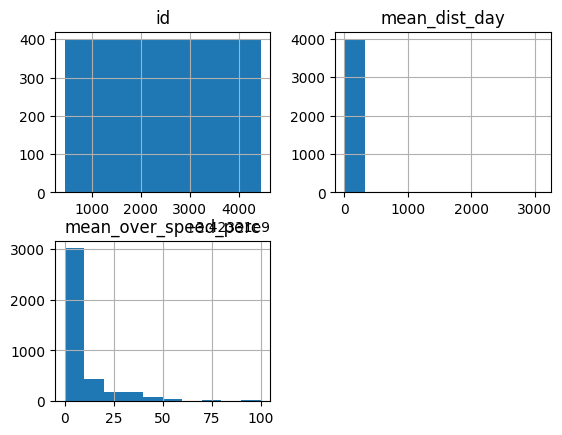

In [242]:
# plotting histogram
df.hist()

### Pre-Processing

In [243]:
# preprocessing the data
df.isnull().sum()

id                      0
mean_dist_day           6
mean_over_speed_perc    4
dtype: int64

In [244]:
# filling the missing values by interpolation
df.interpolate(inplace=True)

df.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

### Scaling

In [245]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### Elbow Method

/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carbo

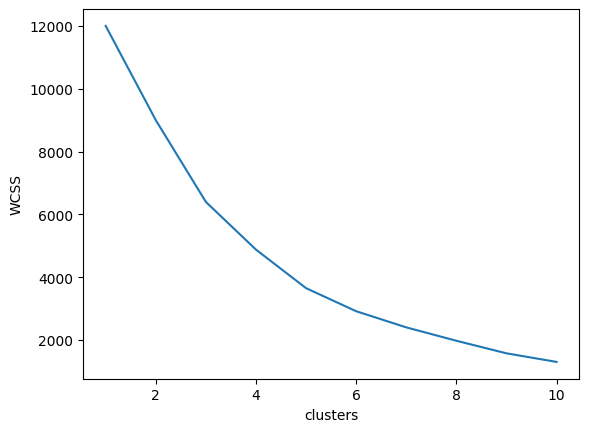

In [246]:
# elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel('clusters')
plt.ylabel('WCSS')
plt.show()

In [247]:
# Optimum number of clusters is 5

### K-Means Clustering

In [248]:
# applying kmeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_scaled)
labels = kmeans.labels_

/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Assigning Labels

In [249]:
# assigning each driver to a specific cluster
df['cluster'] = labels
df.head()

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28.0,3
1,3423313212,52.53,25.0,1
2,3423313724,64.54,27.0,1
3,3423311373,55.69,22.0,0
4,3423310999,54.58,25.0,0


### Visualizing

<AxesSubplot: xlabel='mean_dist_day', ylabel='mean_over_speed_perc'>

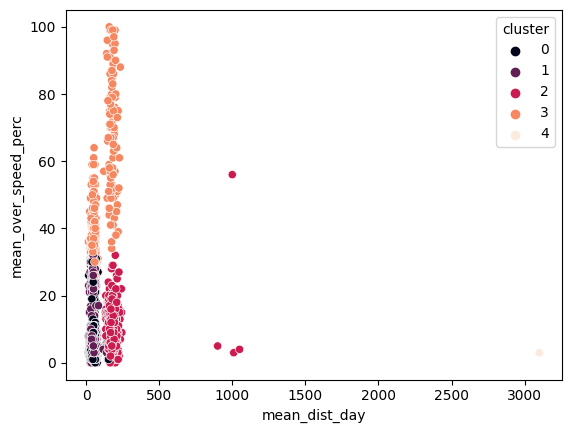

In [250]:
# visualizing the clusters
import seaborn as sns
sns.scatterplot(x='mean_dist_day',y='mean_over_speed_perc',hue='cluster',data=df,palette='rocket')

# Genetic Algorithm

**Question : Genetic Algorithm**

According to the Salesman Problem, The problem says that a salesman is given a set of cities, he has to find the shortest route to as to visit each city exactly once and return to the starting city.

**Implement a genetic algorithm in Python to solve the Traveling Salesman Problem (TSP) . Provide the code for the fitness_function,crossover, and mutation steps. Additionally, explain how the fitness function is defined and the termination condition is determined in this particular implementation.**

---

In [251]:
# Import libraries
import random

In [252]:
# Genetic Algorithm parameters
population_size = 50
city_count = 10
mutation_rate = 0.1
termination_condition = 1000


In [253]:
# Initialize population
def initialize_population():
    population = []
    for _ in range(population_size):
        chromosome = list(range(1, city_count+1))
        random.shuffle(chromosome)
        population.append(chromosome)
    return population


In [254]:
# Define fitness function
def fitness_function(chromosome):
    # euclidean distance between cities
    distance = 0
    for i in range(city_count-1):
        distance += df.iloc[chromosome[i]-1,chromosome[i+1]-1]
    distance += df.iloc[chromosome[city_count-1]-1,chromosome[0]-1]
    return distance

In [255]:
# Evaluate population
def evaluate_population(population):
    population_fitness = {}
    for chromosome in population:
        population_fitness[tuple(chromosome)] = fitness_function(chromosome)
    return sorted(population_fitness.items(), key=lambda x: x[1], reverse=True)


In [256]:
# Selection (tournament selection)
def selection(population, fitness_scores):
    selected_population = []
    for _ in range(population_size):
        tournament = random.sample(range(population_size), 5)
        selected_chromosome = min(tournament, key=lambda x: fitness_scores[x])
        selected_population.append(population[selected_chromosome])
    return selected_population


In [257]:
# Crossover (partially-mapped crossover)
def crossover(parent1, parent2):
    child = [None] * city_count
    gene1 = random.randint(0, city_count-1)
    gene2 = random.randint(0, city_count-1)
    start_gene = min(gene1, gene2)
    end_gene = max(gene1, gene2)
    for i in range(start_gene, end_gene+1):
        child[i] = parent1[i]
    for i in range(city_count):
        if parent2[i] not in child:
            for j in range(city_count):
                if child[j] is None:
                    child[j] = parent2[i]
                    break
    return child

In [258]:
# Mutation (swap mutation)
def mutation(chromosome):
    gene1 = random.randint(0, city_count-1)
    gene2 = random.randint(0, city_count-1)
    chromosome[gene1], chromosome[gene2] = chromosome[gene2], chromosome[gene1]
    return chromosome

In [261]:
# Load distances between cities (example data)
distances = [
    [0, 2, 9, 10, 5, 1, 12, 6, 3, 8],
    [2, 0, 6, 4, 8, 9, 2, 11, 7, 5],
    [9, 6, 0, 11, 10, 7, 6, 3, 2, 1],
    [10, 4, 11, 0, 3, 12, 5, 9, 6, 7],
    [5, 8, 10, 3, 0, 6, 8, 4, 1, 2],
    [1, 9, 7, 12, 6, 0, 10, 5, 2, 4],
    [12, 2, 6, 5, 8, 10, 0, 7, 3, 9],
    [6, 11, 3, 9, 4, 5, 7, 0, 12, 1],
    [3, 7, 2, 6, 1, 2, 3, 12, 0, 10],
    [8, 5, 1, 7, 2, 4, 9, 1, 10, 0]
]

# Genetic Algorithm main loop
generation = 0
population = initialize_population()

while generation < termination_condition:
    # Evaluation
    fitness_scores = evaluate_population(population)

    # Termination condition
    if min(fitness_scores) == 0:
        break

    # Selection
    selected_population = selection(population, fitness_scores)

    # Crossover
    crossovered_population = []
    for i in range(0, population_size, 2):
        child1 = crossover(selected_population[i], selected_population[i+1])
        child2 = crossover(selected_population[i+1], selected_population[i])
        crossovered_population.append(child1)
        crossovered_population.append(child2)

    # Mutation
    mutated_population = []
    for chromosome in crossovered_population:
        if random.random() < mutation_rate:
            mutated_population.append(mutation(chromosome))
        else:
            mutated_population.append(chromosome)

    # Update population
    population = mutated_population
    generation += 1

# Print the best solution
best_chromosome = population[fitness_scores.index(min(fitness_scores))]
print("Best Solution:", best_chromosome)

Best Solution: [3, 8, 10, 5, 4, 6, 1, 2, 7, 9]
